In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.gridspec as gridspec

from PIL import Image
import urllib
import json
import os

In [254]:
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system

## The Data

In [255]:
league = 'League Two'
data = pd.read_csv(f'C:\\Users\\George\\Documents\\Football Analytics\\fotmob_{league}_data.csv')

In [256]:
gk_data = data[data['position'] == 'GK']
gk_data

,match_id,team_id,team_name,player_id,full_name,position,minutes_played,variable,value
0,4203374,8671,Accrington Stanley,882341,Toby Savin,GK,90,Accurate long balls,12.0
1,4203374,8671,Accrington Stanley,882341,Toby Savin,GK,90,Accurate passes,17.0
2,4203374,8671,Accrington Stanley,882341,Toby Savin,GK,90,Acted as sweeper,0.0
3,4203374,8671,Accrington Stanley,882341,Toby Savin,GK,90,Diving save,1.0
4,4203374,8671,Accrington Stanley,882341,Toby Savin,GK,90,Expected assists (xA),0.01
...,...,...,...,...,...,...,...,...,...
532713,4470522,9784,Crewe Alexandra,609751,Maksymilian Stryjek,GK,90,Throws,3.0
532714,4470522,9784,Crewe Alexandra,609751,Maksymilian Stryjek,GK,90,Touches,42.0
532715,4470522,9784,Crewe Alexandra,609751,Maksymilian Stryjek,GK,90,xGOT faced,1.37
532716,4470522,9784,Crewe Alexandra,609751,Maksymilian Stryjek,GK,90,Attempted long balls,30.0


In [257]:
# Get unique matches for each team
unique_matches = gk_data[['team_id', 'match_id']].drop_duplicates()

# Assign match numbers
unique_matches['matchNo'] = unique_matches.groupby('team_id').cumcount() + 1

# Merge match numbers back into the original DataFrame
gk_data = gk_data.merge(unique_matches, on=['team_id', 'match_id'], how='left')

# Display the updated dataframe
gk_data


,match_id,team_id,team_name,player_id,full_name,position,minutes_played,variable,value,matchNo
0,4203374,8671,Accrington Stanley,882341,Toby Savin,GK,90,Accurate long balls,12.0,1
1,4203374,8671,Accrington Stanley,882341,Toby Savin,GK,90,Accurate passes,17.0,1
2,4203374,8671,Accrington Stanley,882341,Toby Savin,GK,90,Acted as sweeper,0.0,1
3,4203374,8671,Accrington Stanley,882341,Toby Savin,GK,90,Diving save,1.0,1
4,4203374,8671,Accrington Stanley,882341,Toby Savin,GK,90,Expected assists (xA),0.01,1
...,...,...,...,...,...,...,...,...,...,...
20424,4470522,9784,Crewe Alexandra,609751,Maksymilian Stryjek,GK,90,Throws,3.0,49
20425,4470522,9784,Crewe Alexandra,609751,Maksymilian Stryjek,GK,90,Touches,42.0,49
20426,4470522,9784,Crewe Alexandra,609751,Maksymilian Stryjek,GK,90,xGOT faced,1.37,49
20427,4470522,9784,Crewe Alexandra,609751,Maksymilian Stryjek,GK,90,Attempted long balls,30.0,49


In [258]:
data = gk_data.copy()

In [259]:
data['value'].fillna(0, inplace=True)
numeric_column = pd.to_numeric(data['value'], errors='coerce')
# Find the indices of rows with NaN values in the numeric_column
nan_indices = numeric_column[numeric_column.isnull()].index
# Filter the original DataFrame to see the non-numeric values
non_numeric_values = data.loc[nan_indices]
data = data.drop(nan_indices)
data.reset_index(drop=True, inplace=True)
data['value'] = data['value'].astype(float)

In [260]:
data['variable'].unique()

array(['Accurate long balls', 'Accurate passes', 'Acted as sweeper',
       'Diving save', 'Expected assists (xA)', 'FotMob rating',
       'Goals conceded', 'Goals prevented', 'High claim',
       'Minutes played', 'Punches', 'Recoveries', 'Saves',
       'Saves inside box', 'Throws', 'Touches', 'xGOT faced',
       'Attempted long balls', 'Attempted passes', 'Saved penalties',
       'Expected goals (xG)', 'Errors led to goal', 'Chances created',
       'Own goal', 'Assists'], dtype=object)

In [261]:
data = data[(data['variable'] == 'xGOT faced') | (data['variable'] == 'Goals conceded')].reset_index(drop=True)

In [262]:
data

,match_id,team_id,team_name,player_id,full_name,position,minutes_played,variable,value,matchNo
0,4203374,8671,Accrington Stanley,882341,Toby Savin,GK,90,Goals conceded,0.00,1
1,4203374,8671,Accrington Stanley,882341,Toby Savin,GK,90,xGOT faced,0.35,1
2,4203374,10262,Newport County,498522,Nick Townsend,GK,90,Goals conceded,3.00,1
3,4203374,10262,Newport County,498522,Nick Townsend,GK,90,xGOT faced,2.86,1
4,4203365,8647,Crawley Town,728127,Corey Addai,GK,90,Goals conceded,0.00,1
...,...,...,...,...,...,...,...,...,...,...
2201,4470520,8647,Crawley Town,728127,Corey Addai,GK,90,xGOT faced,2.69,48
2202,4470522,8647,Crawley Town,728127,Corey Addai,GK,90,Goals conceded,0.00,49
2203,4470522,8647,Crawley Town,728127,Corey Addai,GK,90,xGOT faced,0.38,49
2204,4470522,9784,Crewe Alexandra,609751,Maksymilian Stryjek,GK,90,Goals conceded,2.00,49


In [263]:
# Assuming your dataframe is named 'data'

# Pivot the data
pivoted_data = data.pivot(index=['match_id', 'team_id', 'team_name', 'player_id', 'full_name', 'position', 'minutes_played', 'matchNo'],
                          columns='variable', 
                          values='value')

# Reset the index to turn the index columns back into regular columns
pivoted_data = pivoted_data.reset_index()

# Rename the columns to match the desired output
pivoted_data = pivoted_data.rename(columns={
    'full_name': 'playerName',
    'minutes_played': 'minutes',
    'player_id': 'playerId',
    'team_id': 'teamId',
    'Goals conceded': 'goals_conceded',
    'xGOT faced': 'xGOT'
})

# Sort the dataframe if needed
pivoted_data = pivoted_data.sort_values('matchNo')

In [264]:
df = pivoted_data

In [265]:
df.rename(columns={'team_id': 'teamId', 'player_id': 'playerId', 'full_name': 'playerName', 'position': 'role', 'Goals prevented': 'Goals prevented', 'team_name':'teamName', 'minutes_played':'minutes'}, inplace=True)

In [266]:
df_grouped = df.groupby(['playerName', 'playerId', 'teamId', 'teamName'])['minutes'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='minutes', ascending=False)
df_grouped = df_grouped[0:12]
df_grouped.reset_index(drop=True, inplace=True)

In [267]:
df_grouped

,playerName,playerId,teamId,teamName,minutes
0,Ben Hinchliffe,95325,10007,Stockport County,4140
1,Alex Cairns,279481,282326,Salford City,4140
2,Christy Pym,430434,9818,Mansfield Town,4140
3,Luke McGee,597503,8313,Tranmere Rovers,4008
4,Paul Farman,162458,6350,Barrow,3960
5,Alex Bass,568581,158319,AFC Wimbledon,3960
6,Nick Townsend,498522,10262,Newport County,3825
7,Corey Addai,728127,8647,Crawley Town,3780
8,Owen Goodman,1415372,8416,Colchester United,3420
9,Jake Turner,788719,10173,Gillingham,3330


In [268]:
df.fillna(0, inplace=True)

In [269]:
df_filtered = df[df['playerId'].isin(df_grouped['playerId'])].sort_values(by='matchNo').reset_index(drop=True)
df_filtered['rolling_xGOT'] = df_filtered.groupby(['playerId', 'playerName', 'teamId'])['xGOT'].cumsum()
df_filtered['rolling_goals'] = df_filtered.groupby(['playerId', 'playerName', 'teamId'])['goals_conceded'].cumsum()
df_filtered['rolling_diff'] = df_filtered['rolling_xGOT'] - df_filtered['rolling_goals']

In [270]:
df_filtered['matchNo'] = df_filtered.groupby('playerName').cumcount() + 1

In [271]:
df_filtered = df_filtered.sort_values(by='matchNo')

In [272]:
df_filtered.reset_index(drop=True, inplace=True)

## The Viz

In [273]:
def plot_gk_xgot(ax, player_highlight, label_x=True, label_y=False):
    ax.grid(ls='--', color='#efe9e6', zorder=2)

    for x in df_filtered['playerId'].unique():
        aux_df = df_filtered[df_filtered['playerId'] == x].reset_index(drop=True)
        if x == player_highlight:
            if aux_df['rolling_diff'].iloc[-1] > 0:
                color = '#336699'
                aux_text = '+'
            else:
                color = '#DA4167'
                aux_text = ''
            ax.plot(aux_df.index, aux_df['rolling_diff'], lw=1.5, color=color, zorder=5, markevery=[-1], marker='o', ms=6, mfc='white')
        else:
            ax.plot(aux_df.index, aux_df['rolling_diff'], lw=.75, color='grey', alpha=0.25)

    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0,0], color='black', ls='dashed', lw=1)
    # -- Fancy fillbetween
    ax.fill_between(x=[ax.get_xlim()[0], ax.get_xlim()[1]], 
                    y1=0, y2=ax.get_ylim()[1], color='#336699', alpha=0.05, ec='None', hatch='......', zorder=1)
    ax.fill_between(x=[ax.get_xlim()[0], ax.get_xlim()[1]], 
                    y1=0, y2=ax.get_ylim()[0], color='#DA4167', alpha=0.05, ec='None', hatch='......', zorder=1)
    # -- Highlighted player annotation
    highlight_df = df_filtered[df_filtered['playerId'] == player_highlight].reset_index(drop=True)
    text_ = ax.annotate(
        xy=(highlight_df.index[-1], highlight_df['rolling_diff'].iloc[-1]),
        text=f"{aux_text} {highlight_df['rolling_diff'].iloc[-1]:.1f}",
        xytext=(10,5),
        textcoords='offset points',
        weight='bold',
        ha='center',
        va='center',
        color=color,
        size=7,
        zorder=3
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
    )
    if label_x:
        ax.set_xlabel('Match index', fontdict={'font': regular})
    else:
        ax.set_xticklabels([])
    if label_y:
        ax.set_ylabel('Cum. xGOT minus goals conceded', fontdict={'font': regular})
    else:
        ax.set_yticklabels([])
    
    for label in ax.get_xticklabels():
        label.set_fontproperties(regular)
    for label in ax.get_yticklabels():
        label.set_fontproperties(regular)

    return ax

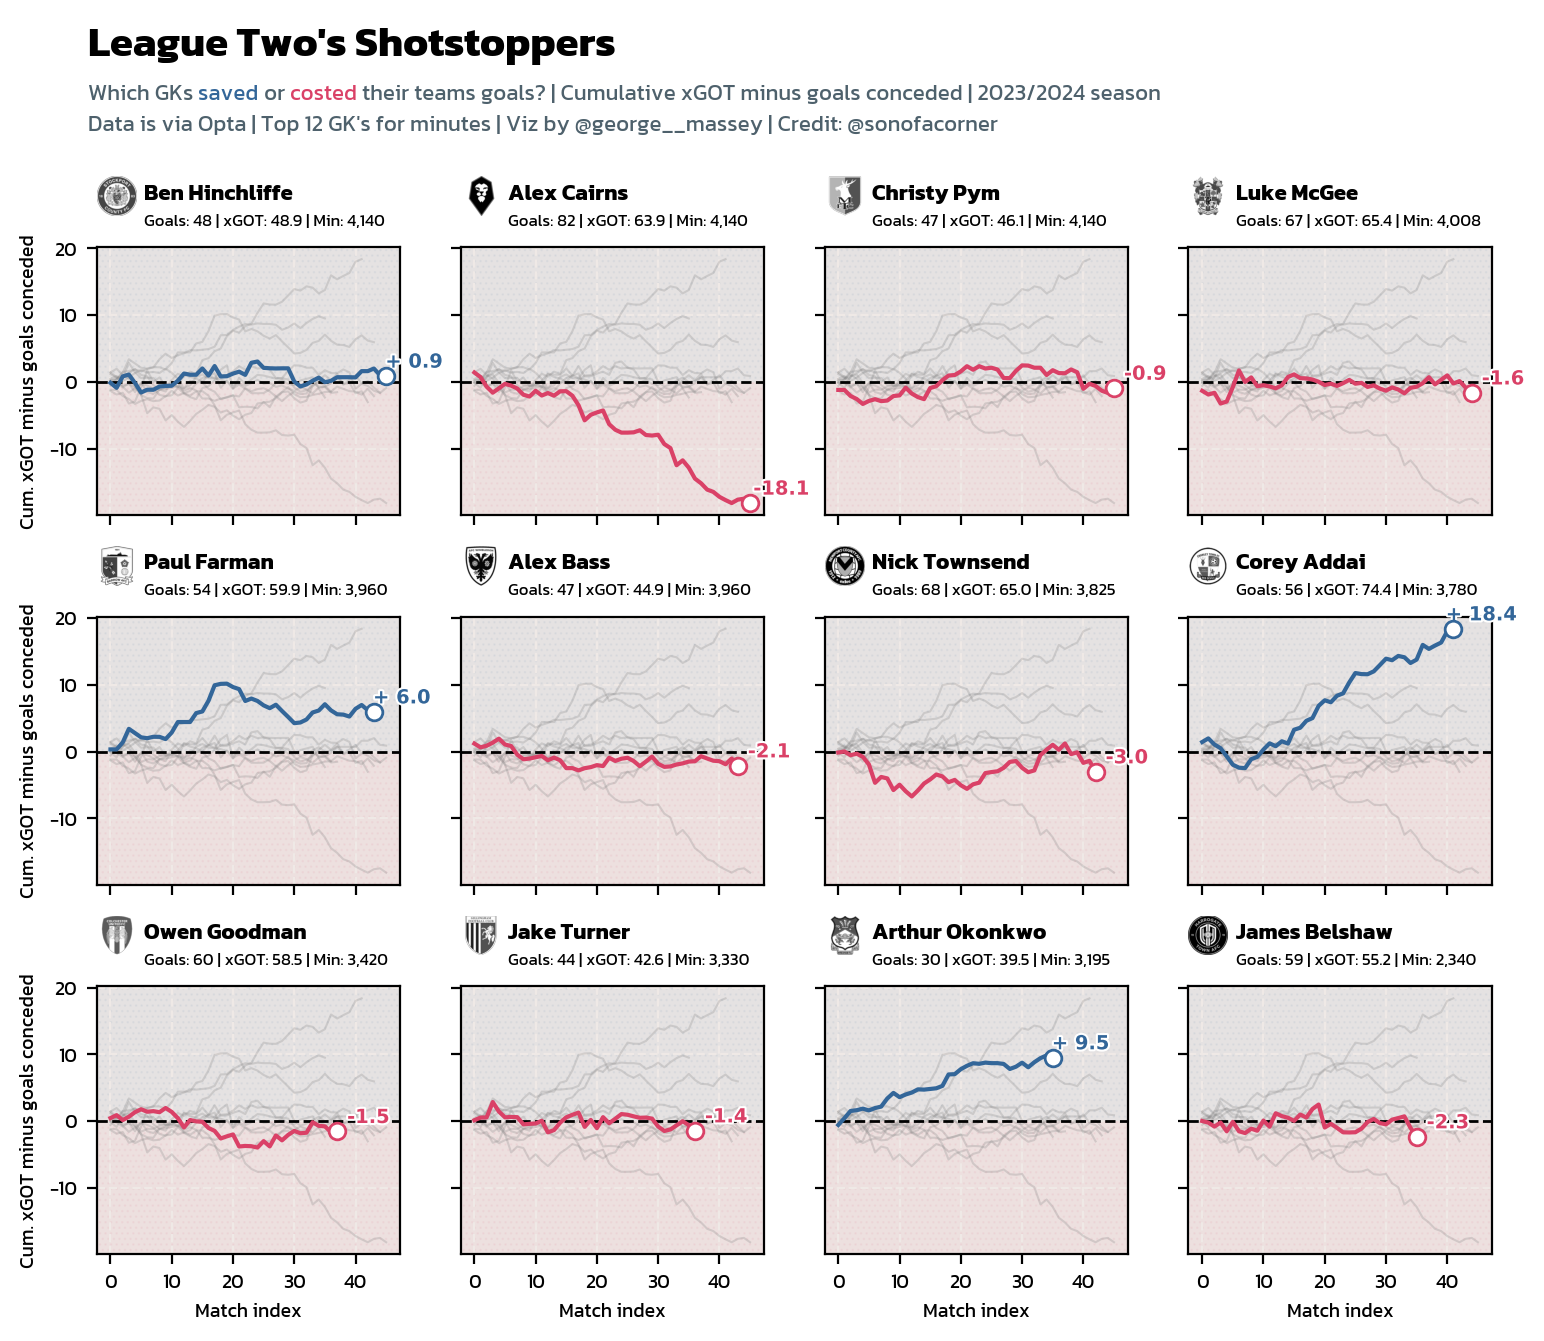

In [274]:
fig = plt.figure(figsize=(9, 7), dpi = 200)
nrows = 6
ncols = 4
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig, 
    height_ratios = [(1/nrows)*2.6 if x % 2 != 0 else (1/nrows)/2.6 for x in range(nrows)], hspace=0.2
)

plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['hatch.linewidth'] = 0.5

plot_counter = 0
logo_counter = 0
for row in range(nrows):
    for col in range(ncols):
        if row % 2 != 0:
            ax = plt.subplot(
                gspec[row, col],
                facecolor = "#EFE9E6"
            )
            playerId = df_grouped['playerId'].iloc[plot_counter]
            if col == 0:
                label_y = True
            else:
                label_y = False
            if row == 5:
                label_x = True
            else:
                label_x = False
            
            plot_gk_xgot(ax, playerId, label_x, label_y)           
            plot_counter += 1
        else:
            teamId = df_grouped['teamId'].iloc[logo_counter]
            playerName = df_grouped['playerName'].iloc[logo_counter]
            minutes_played = df_grouped['minutes'].iloc[logo_counter]
            goals_conceded = df_filtered[df_filtered['playerName'] == playerName]['goals_conceded'].sum()
            xGOT_conceded = df_filtered[df_filtered['playerName'] == playerName]['xGOT'].sum()
            fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
            logo_ax = plt.subplot(
                gspec[row,col],
                anchor = 'NW', facecolor = '#EFE9E6'
            )
            club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{teamId:.0f}.png')).convert('LA')
            logo_ax.imshow(club_icon)
            logo_ax.axis('off')
            # # -- Add the team name
            ax_text(
                x = 1.2, 
                y = .8,
                s = f'<{playerName}>\nGoals: {goals_conceded:.0f} | xGOT: {xGOT_conceded:.1f} | Min: {minutes_played:,.0f}',
                ax = logo_ax, 
                highlight_textprops=[{'weight':'bold', 'font':bold, 'size':'8'}],
                fontproperties = regular, 
                ha = 'left', 
                size = 6, 
                annotationbbox_kw = {'xycoords':'axes fraction'}
            )
            logo_counter += 1
    
fig_text(
    x=0.12, y=.96, 
    s=f'{league}\'s Shotstoppers',
    va='bottom', ha='left',
    fontsize=15, color='black', fontproperties = bold
)
fig_text(
	x=0.12, y=.91, 
    s=f'Which GKs <saved> or <costed> their teams goals? | Cumulative xGOT minus goals conceded | 2023/2024 season\nData is via Opta | Top 12 GK\'s for minutes | Viz by @george__massey | Credit: @sonofacorner',
    highlight_textprops=[{'weight':'bold', 'color': '#336699'}, {'weight':'bold', 'color': '#DA4167'}],
	va='bottom', ha='left',
	fontsize=8, color='#4E616C', fontproperties = regular
)

plt.savefig(
	f"C:\\Users\\George\\Documents\\Football Analytics\\Visuals\\{league} Shotstoppers.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)